In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib as mpl
import os
import glob
mpl.rcParams['figure.dpi'] = 70

In [2]:
def line_95_percent(cummulative_regret, label=None, color=None, linewidth=3, alpha=0.3):
    m = np.mean(cummulative_regret, axis=0)
    s = np.std(cummulative_regret, axis=0)
    u = m + s * 1.96
    l = m - s * 1.96
    plt.plot(m, label=label, color=color, linewidth=linewidth)
#     plt.plot(m, label=label,linewidth=linewidth)
    plt.fill_between(range(cummulative_regret.shape[1]), u, l, alpha=alpha)

In [3]:
def preprocess(dir_path):
    M = []
    for file in glob.glob('{}/result*'.format(dir_path)):
        with open(file, 'rb') as f:
            reward, time_step = pickle.load(f)
            n = int(np.ceil(time_step[-1]/1e3))*1000
            x = range(n)
            y = np.interp(x,  time_step, reward)
            M.append(y)
    M = np.vstack(M)
    return M


def plot(path, limit_line):
    M = preprocess(path)
    plt.grid()
    line_95_percent(M, 'avg')
    plt.xlabel('t', fontweight='bold')
    plt.ylabel('Reward', fontweight='bold')
    plt.axhline(limit_line, color='r')

# Sensitivity plot

In [8]:
!ls ../tmp|grep Acr|grep 30000

algo-val-env-Acrobot-v1-fourier_order-2-beta-0.0001-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
algo-val-env-Acrobot-v1-fourier_order-2-beta-0.001-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
algo-val-env-Acrobot-v1-fourier_order-2-beta-0.01-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
algo-val-env-Acrobot-v1-fourier_order-2-beta-0.1-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
algo-val-env-Acrobot-v1-fourier_order-2-beta-1000.0-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
algo-val-env-Acrobot-v1-fourier_order-2-beta-100.0-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
algo-val-env-Acrobot-v1-fourier_order-2-beta-10.0-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
algo-val-env-Acrobot-v1-fourier_order-2-beta-1.0-lambda-1.0-step-30000-discount-0.999-sample_len-5-n_eval-1-repeat-30
algo-val-env-Acrobot-v1-fourier_order-2-beta-1.0-la

In [17]:
'../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-0.0001-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30'.split('-')[8]

'0.0001'

In [21]:
import re

In [22]:
v = 'algo-val-env-Acrobot-v1-fourier_order-2-beta-1e-06-lambda-1.0-step-30000-discount-0.99-sample_len-1000-n_eval-5-repeat-30'

In [29]:
def get_beta(s):
    b = s.split('-')[8:10]
    if 'lambda' in b:
        return b[0]
    else:
        return '-'.join(b)

In [45]:
paths

['../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-0.0001-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30',
 '../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-0.001-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30',
 '../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-0.01-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30',
 '../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-0.1-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30',
 '../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-1.0-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30',
 '../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-10.0-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30',
 '../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-100.0-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30',
 '../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-1000.0-lambda-1.0-step-30000-discount-0.9

In [57]:
T = 30
g = 1-T**(-1./6)
b = 1/(1-g)
g, b

(0.43269955502525537, 1.762734383267615)

In [14]:
[0.0001 * np.power(10,i) for i in range(9)]

[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-1e-05-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-1e-06-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-1.0-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-10.0-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-20.0-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-50.0-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-70.0-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30


/home/oong/.pyenv/versions/3.7.4/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/oong/.pyenv/versions/3.7.4/envs/env37/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


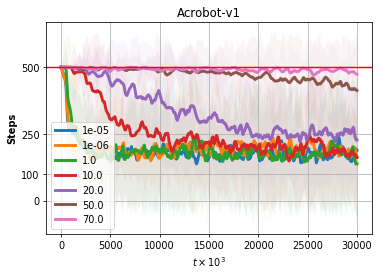

In [58]:
# paths = [i for i in glob.glob('../tmp/**') if 'Acrobot' in i and '30000' in i and 'repeat-30' in i and 'sample_len-5-n_eval-1' in i]
# beta = [get_beta(e) for e in paths]

plt.grid()
# beta = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
beta = [1e-5, 1e-6, 1.0, 10.0, 20.0, 50.0, 70.0]
paths = ['../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-{}-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30'.format(b) for b in beta]
for p, beta in zip(paths, beta):
    print(p)
    M = preprocess(p)
    line_95_percent(M, beta, alpha=0.05)
plt.xlabel('t', fontweight='bold')
plt.ylabel('Steps', fontweight='bold')
plt.axhline(500, color='r')
plt.yticks([0,100,250,500])
# plt.xticks(range(0, 16000, 5000), range(0,16,5))
plt.xlabel(r'$t\times 10^3$', fontweight='bold')
plt.title('Acrobot-v1')
plt.legend()
plt.savefig('acrobot-v1', dpi=300)

../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-1e-05-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-1e-06-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-1e-07-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-1e-08-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-1e-09-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30
../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-1e-10-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30


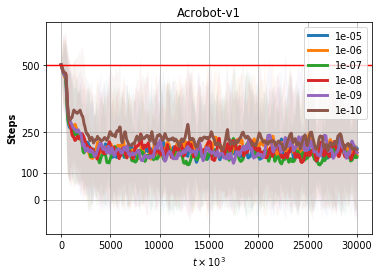

In [10]:
# paths = [i for i in glob.glob('../tmp/**') if 'Acrobot' in i and '30000' in i and 'repeat-30' in i and 'sample_len-5-n_eval-1' in i]
# beta = [get_beta(e) for e in paths]

plt.grid()
# beta = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
beta = [1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
paths = ['../tmp/algo-val-env-Acrobot-v1-fourier_order-2-beta-{}-lambda-1.0-step-30000-discount-0.99-sample_len-5-n_eval-1-repeat-30'.format(b) for b in beta]
for p, beta in zip(paths, beta):
    print(p)
    M = preprocess(p)
    line_95_percent(M, beta, alpha=0.05)
plt.xlabel('t', fontweight='bold')
plt.ylabel('Steps', fontweight='bold')
plt.axhline(500, color='r')
plt.yticks([0,100,250,500])
# plt.xticks(range(0, 16000, 5000), range(0,16,5))
plt.xlabel(r'$t\times 10^3$', fontweight='bold')
plt.title('Acrobot-v1')
plt.legend()
plt.savefig('acrobot-v1', dpi=300)

# Cartpole Plot v0

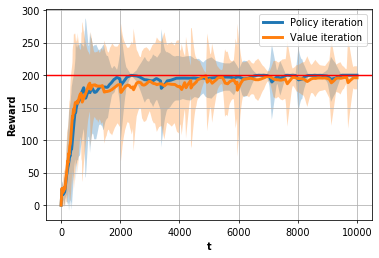

In [76]:
plt.grid()
M = preprocess('../tmp/algo-pol-env-CartPole-v0-fourier_order-2-beta-2.0-lambda-1.0-step-10000-discount-0.99-sample_len-5-n_eval-1-repeat-15')
line_95_percent(M, 'Policy iteration')
M = preprocess('../tmp/algo-val-env-CartPole-v0-fourier_order-2-beta-2.0-lambda-1.0-step-10000-discount-0.99-sample_len-5-n_eval-1-repeat-15')
line_95_percent(M, 'Value iteration')
plt.xlabel('t', fontweight='bold')
plt.ylabel('Reward', fontweight='bold')
plt.axhline(200, color='r')
plt.legend()

# Cartpole Plot v1

In [4]:
!ls ../tmp|grep Cart|grep v1|grep 15|grep 100

Text(0.5, 0, '$t\\times 10^3$')

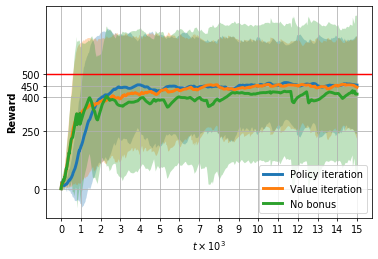

In [31]:
plt.grid()
M = preprocess('../tmp/algo-pol-env-CartPole-v1-fourier_order-2-beta-2.0-lambda-1.0-step-15000-discount-0.99-sample_len-100-n_eval-5-repeat-100')
line_95_percent(M, 'Policy iteration')
M = preprocess('../tmp/algo-val-env-CartPole-v1-fourier_order-2-beta-2.0-lambda-1.0-step-15000-discount-0.99-sample_len-1-n_eval-1-repeat-100')
line_95_percent(M, 'Value iteration')
M = preprocess('../tmp/algo-val-env-CartPole-v1-fourier_order-2-beta-2.0-lambda-1.0-step-15000-discount-0.99-sample_len-1-n_eval-1-repeat-10-bonus-False')
line_95_percent(M, 'No Exploration')
plt.xlabel('t', fontweight='bold')
plt.ylabel('Reward', fontweight='bold')
plt.axhline(500, color='r')
plt.yticks([0,250,400,450,500])
plt.legend(loc=4)
plt.xticks(range(0, 16000, 1000), range(0,16))
plt.xlabel(r'$t\times 10^3$', fontweight='bold')

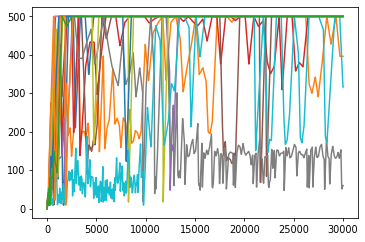

In [79]:
for i in M:
    plt.plot(i)

Text(0.5, 0, '$t\\times 10^3$')

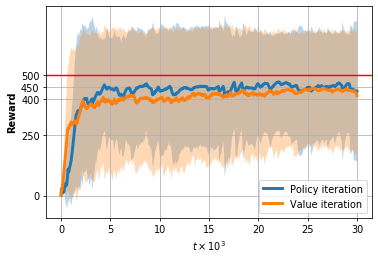

In [41]:
plt.grid()
M = preprocess('../tmp/algo-pol-env-CartPole-v1-fourier_order-2-beta-2.0-lambda-1.0-step-30000-discount-0.99-sample_len-100-n_eval-5-repeat-50')
line_95_percent(M, 'Policy iteration')
M = preprocess('../tmp/algo-val-env-CartPole-v1-fourier_order-2-beta-2.0-lambda-1.0-step-30000-discount-0.99-sample_len-1-n_eval-1-repeat-50')
line_95_percent(M, 'Value iteration')
plt.xlabel('t', fontweight='bold')
plt.ylabel('Reward', fontweight='bold')
plt.axhline(500, color='r')
plt.yticks([0,250,400,450,500])
plt.legend(loc=4)
plt.xticks(range(0, 31000, 5000), range(0,31,5))
plt.xlabel(r'$t\times 10^3$', fontweight='bold')

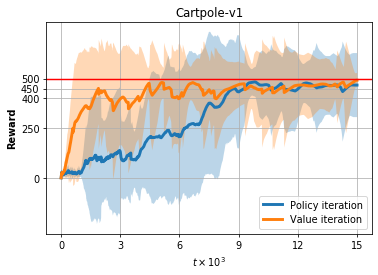

In [38]:
plt.grid()
max_step = 15000
M = preprocess('../train_result/pol-cartpole-v1-f2-b2-15e3-ld-1')
line_95_percent(M, 'Policy iteration')
M = preprocess('../train_result/cartpole-v1-f2-b2-15e3-ld-1')
line_95_percent(M, 'Value iteration', 'g')
plt.xlabel(r'$t\times 10^3$', fontweight='bold')
plt.ylabel('Reward', fontweight='bold')
plt.axhline(500, color='r')
plt.title('Cartpole-v1')
plt.yticks([0,250,400,450,500])
plt.xticks(range(0, 16000, 3000), range(0,16,3))
plt.legend(loc=4)
plt.savefig('cartpole-v1.png', dpi=300)

# Mountain Car

In [28]:
!ls ../tmp|grep Mount|grep 20000| grep repeat-10

algo-val-env-MountainCar-v0-fourier_order-2-beta-1.0-lambda-1.0-step-20000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True
algo-val-env-MountainCar-v0-fourier_order-2-beta-10.0-lambda-1.0-step-20000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True
algo-val-env-MountainCar-v0-fourier_order-2-beta-20.0-lambda-1.0-step-20000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-False
algo-val-env-MountainCar-v0-fourier_order-2-beta-20.0-lambda-1.0-step-20000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True
algo-val-env-MountainCar-v0-fourier_order-2-beta-5.0-lambda-1.0-step-20000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True


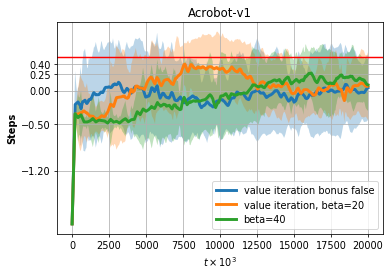

In [42]:
# paths = [i for i in glob.glob('../tmp/**') if 'Acrobot' in i and '30000' in i and 'repeat-30' in i and 'sample_len-5-n_eval-1' in i]
# beta = [get_beta(e) for e in paths]

plt.grid()
M = preprocess('../tmp/algo-val-env-MountainCar-v0-fourier_order-2-beta-20.0-lambda-1.0-step-20000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-False')
line_95_percent(M, 'value iteration bonus false')
# M = preprocess('../tmp/algo-val-env-MountainCar-v0-fourier_order-2-beta-1.0-lambda-1.0-step-20000-discount-0.999-sample_len-5-n_eval-1-repeat-5-bonus-True')
# line_95_percent(M, 'value iteration,beta=1.')
# M = preprocess('../tmp/algo-val-env-MountainCar-v0-fourier_order-2-beta-5.0-lambda-1.0-step-20000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True')
# line_95_percent(M, 'value iteration, beta=5')
# M = preprocess('../tmp/algo-val-env-MountainCar-v0-fourier_order-2-beta-10.0-lambda-1.0-step-20000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True')
# line_95_percent(M, 'value iteration, beta=10')
M = preprocess('../tmp/algo-val-env-MountainCar-v0-fourier_order-2-beta-20.0-lambda-1.0-step-20000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True')
line_95_percent(M, 'value iteration, beta=20')
# M = preprocess('../tmp/algo-val-env-MountainCar-v0-fourier_order-2-beta-30.0-lambda-1.0-step-20000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True')
# line_95_percent(M, 'value iteration, beta=30')
M = preprocess('../tmp/algo-val-env-MountainCar-v0-fourier_order-2-beta-40.0-lambda-1.0-step-20000-discount-0.999-sample_len-5-n_eval-1-repeat-10-bonus-True')
line_95_percent(M, 'beta=40')

plt.xlabel('t', fontweight='bold')
plt.ylabel('Steps', fontweight='bold')
plt.axhline(0.5, color='r')
plt.yticks([-1.2,-0.5,0,0.25, 0.4])
# plt.xticks(range(0, 16000, 5000), range(0,16,5))
plt.xlabel(r'$t\times 10^3$', fontweight='bold')
plt.title('Acrobot-v1')
plt.legend()
plt.savefig('acrobot-v1', dpi=300)

# Lunar Lander

In [45]:
!ls ../tmp|grep Luna

algo-val-env-LunarLander-v2-fourier_order-2-beta-10.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-1-bonus-True
algo-val-env-LunarLander-v2-fourier_order-2-beta-3.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-1-bonus-False


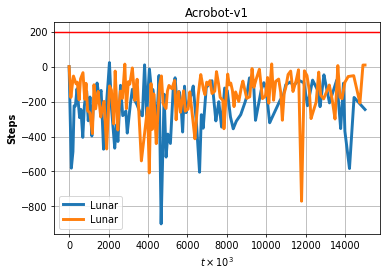

In [46]:
# paths = [i for i in glob.glob('../tmp/**') if 'Acrobot' in i and '30000' in i and 'repeat-30' in i and 'sample_len-5-n_eval-1' in i]
# beta = [get_beta(e) for e in paths]

plt.grid()
M = preprocess('../tmp/algo-val-env-LunarLander-v2-fourier_order-2-beta-3.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-1-bonus-False')
line_95_percent(M, 'Lunar')
M = preprocess('../tmp/algo-val-env-LunarLander-v2-fourier_order-2-beta-10.0-lambda-1.0-step-15000-discount-0.999-sample_len-5-n_eval-1-repeat-1-bonus-True')
line_95_percent(M, 'Lunar')

plt.xlabel('t', fontweight='bold')
plt.ylabel('Steps', fontweight='bold')
plt.axhline(200, color='r')
# plt.yticks([-1.2,-0.5,0,0.25, 0.4])
# plt.xticks(range(0, 16000, 5000), range(0,16,5))
plt.xlabel(r'$t\times 10^3$', fontweight='bold')
plt.title('Acrobot-v1')
plt.legend()
plt.savefig('acrobot-v1', dpi=300)